In [162]:
# EXPLICIT FINITE SECOND-ORDER CENTRAL DIFFERENCE METHOD ON THE 1D HEAT EQUATION 
# Charles Wszalek
# 5/20/2024
# 
#     Ut = Uxx
# U(0,t) = 0
# U(1,t) = 1
# U(x,0) = sin(x * 5pi/2)^2
# 
# INSPIRATION
# https://en.wikipedia.org/wiki/Finite_difference_method 
# CALCULATIONS
# https://www.overleaf.com/read/rfpqfdfwsyqt#69f6b7

# IMPORTS
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cbook, cm
from matplotlib.colors import LightSource

In [163]:
# DEFINE AXES
base = 50 # RESOLUTION OF THE SIMULATION 
xmax = 1
tmax = 1
xsteps = base        # <- CHOSEN TO ENSURE STABILITY
tsteps = base**2 * 2 # <- CHOSEN TO ENSURE STABILITY
x = np.linspace(0,xmax,xsteps)
t = np.linspace(0,tmax,tsteps)
X, T = np.meshgrid(x,t)

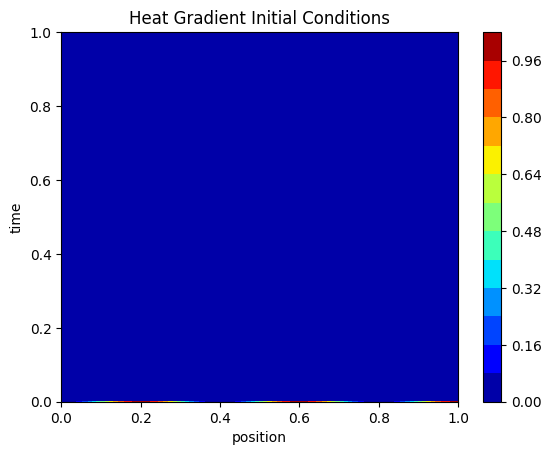

In [164]:
# INITIAL CONDITIONS
Z = np.zeros_like(X * T)
for i in range(len(Z[0])):
    Z[0][i] = np.sin(x[i] * np.pi /2 * 5) **2
Z[0][xsteps-1] = 1

# VISUALIZATION
'''
plt.imshow(Z, cmap = 'jet')
plt.title('Heat Gradient Initial Condition')
plt.xlabel('position')
plt.ylabel('time')
plt.colorbar() 
plt.show()
'''

plt.contourf(x, t, Z, cmap = 'jet', levels = 15) 
plt.title('Heat Gradient Initial Conditions')
plt.xlabel('position')
plt.ylabel('time')
plt.colorbar() 
plt.show()

In [165]:
# PROPOGATION
h = xmax/xsteps
k = tmax/tsteps
r = k/(h*h) / 40 # DIVIDE BY 40 TO SLOW THE HEAT FLOW FOR VISUALIZATION
for i in np.arange(tsteps-1): # time
    for j in np.arange(xsteps-2)+1: # space
        Z[i][xsteps-1] = 1
        Z[i][0] = 0
        Z[i+1][j] = (1-2*r)*Z[i][j] + r*Z[i][j-1] + r*Z[i][j+1] 
        Z[i+1][xsteps-1] = 1
        Z[i+1][0] = 0

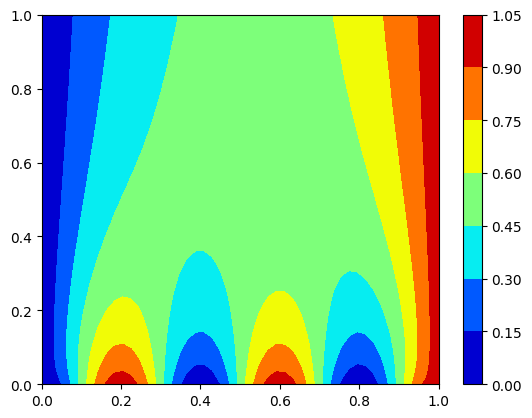

In [166]:
# 2D PLOTTING
# plt.imshow(Z)
# plt.colorbar() 
# plt.show()
plt.contourf(x, t, Z, cmap = 'jet') 
plt.colorbar()
plt.show()

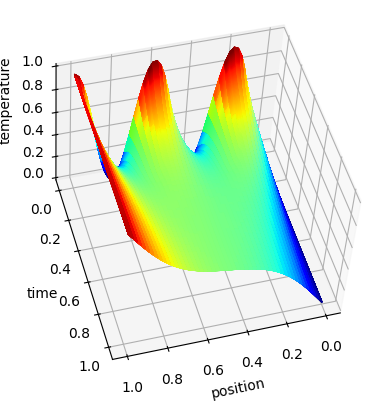

" PLOT LESS OF Z (NOT WORKING)\nT = T[:,:round(tsteps*.2)]\nZ = Z[:,:round(tsteps*.2)]\nfig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))\nls = LightSource(250, 30)\nrgb = ls.shade(Z, cmap=cm.magma, vert_exag=0.1, blend_mode='soft')\nsurface = ax1.plot_surface(X, T, Z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)\nax1.view_init(elev=40., azim=70, roll=0)\nplt.show()\n"

In [167]:
# 3D PLOTTING
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ls = LightSource(250, 30)
rgb = ls.shade(Z, cmap=cm.jet, vert_exag=0.1, blend_mode='soft')
surface = ax.plot_surface(X, T, Z, rstride=1, cstride=1, facecolors=rgb, linewidth=1, antialiased=True, shade=False)
ax.view_init(elev=50., azim=70, roll=-5)
ax.set_xlabel("position")
ax.set_ylabel("time")
ax.set_zlabel("temperature")
plt.show()
""" PLOT LESS OF Z (NOT WORKING)
T = T[:,:round(tsteps*.2)]
Z = Z[:,:round(tsteps*.2)]
fig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))
ls = LightSource(250, 30)
rgb = ls.shade(Z, cmap=cm.magma, vert_exag=0.1, blend_mode='soft')
surface = ax1.plot_surface(X, T, Z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
ax1.view_init(elev=40., azim=70, roll=0)
plt.show()
"""